# Program to predict the number of Death counts

## Dataset Description

Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths, and reported recoveries. Data is disaggregated by country (and sometimes sub region). Coronavirus disease (COVID-19) is caused by Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

This dataset includes data for tracking the number of people affected by COVID-19 worldwide, including:

i)confirmed tested cases of Coronavirus infection

ii)the number of people who have reportedly died while sick with Coronavirus

iii)the number of people who have reportedly recovered from it


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
#loading the dataframe
df=pd.read_csv("covid.csv")
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


# Basic Statistics of Our DataSet

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [7]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [9]:
df.shape

(23688, 5)

In [10]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

# Finding Missing Values

In [14]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

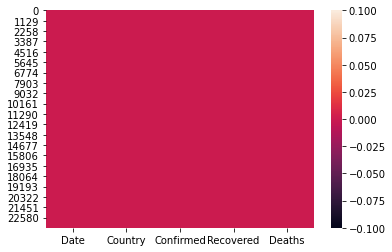

In [15]:
#missing value in data visuvalization
sns.heatmap(df.isnull())

###### Observation:

    we can see no missing values

# Attributes Analysis

## column Date

In [16]:
df["Date"].nunique()

126

In [17]:
df["Date"].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [19]:
df["Date"].value_counts()

2020-04-12    188
2020-03-18    188
2020-01-30    188
2020-04-08    188
2020-01-25    188
             ... 
2020-02-26    188
2020-03-08    188
2020-03-13    188
2020-05-02    188
2020-05-25    188
Name: Date, Length: 126, dtype: int64

###### Observation:

we can observe that the column date is not gonna do much work on Predicting our Target.

so Droping column "Date" is recommended 

## column Country

In [20]:
df["Country"].nunique()

188

In [22]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

###### Observation:

we observe that there are more countries listed in column Country.

The column country can be more helpful in future Prediction.

so later we convert the column country into numeric using Label Encoder  

# EDA

<function matplotlib.pyplot.show(*args, **kw)>

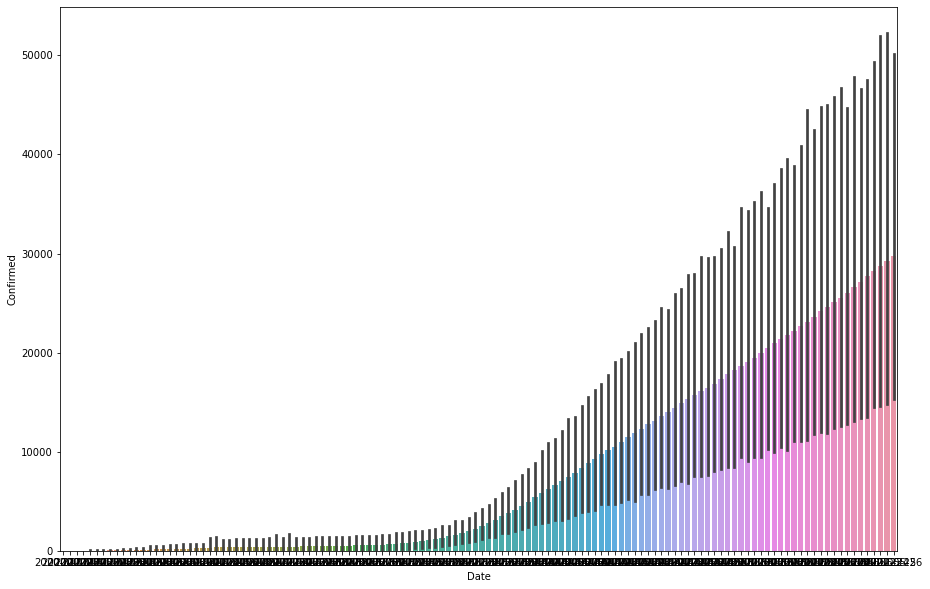

In [30]:
#date vs confirmed
plt.figure(figsize=(15,10))
sns.barplot(x="Date",y="Confirmed",data=df)
plt.show

###### Observation:
we can clearly see that when days progress the number of confirmed cases increases

<function matplotlib.pyplot.show(*args, **kw)>

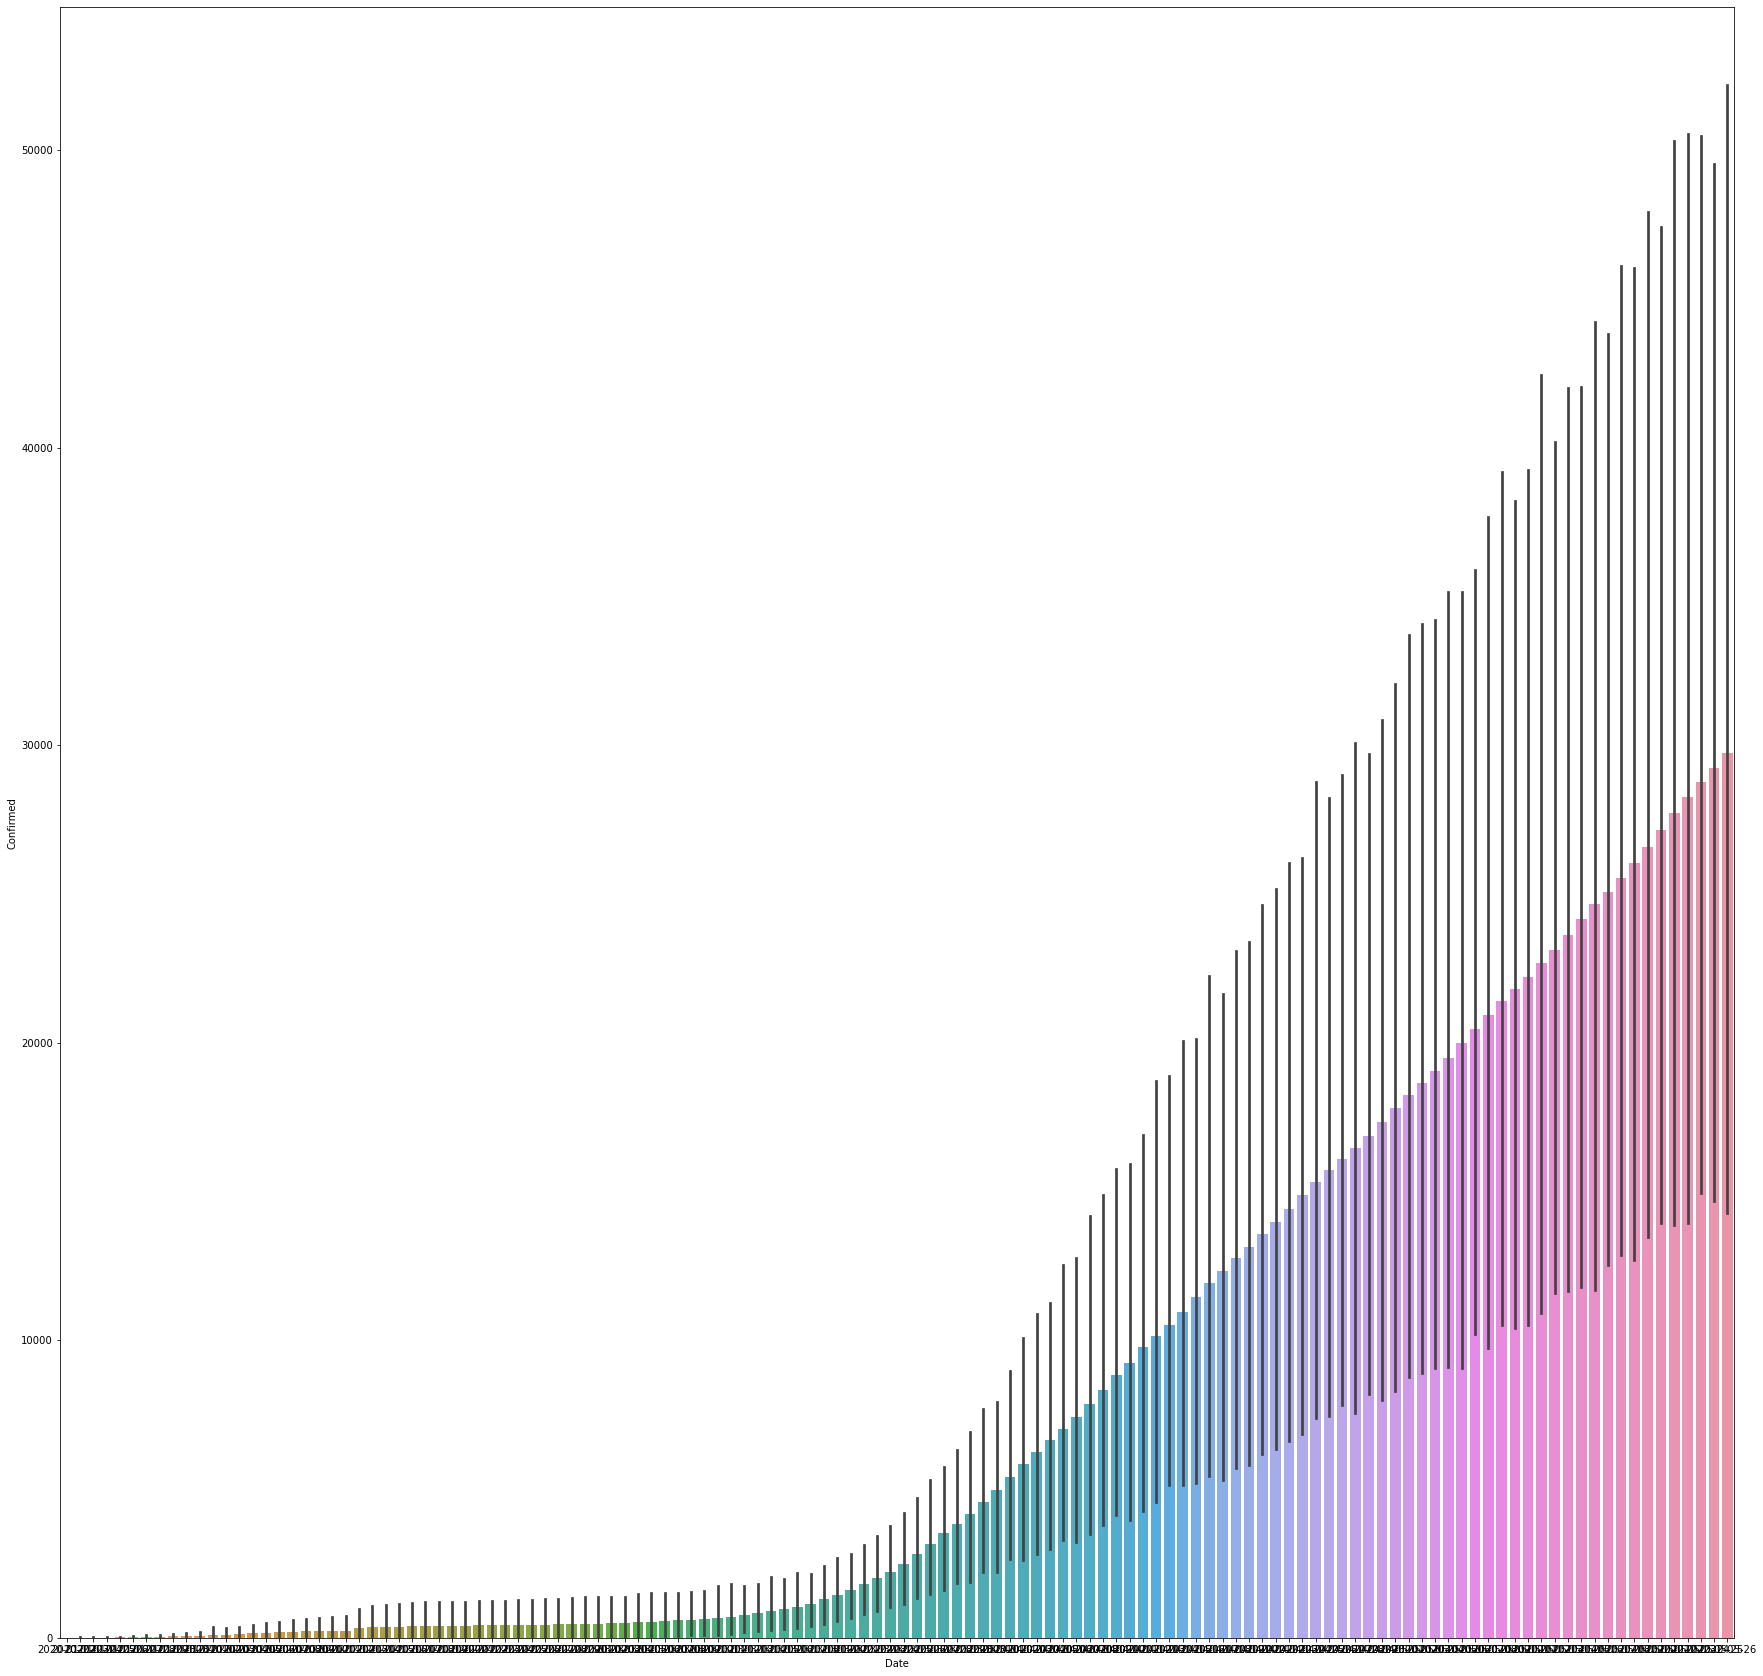

In [31]:
#date vs confirmed
plt.figure(figsize=(30,30))
sns.barplot(x="Date",y="Confirmed",data=df)
plt.show

# Correlation

In [39]:
cor=df.corr()
cor

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


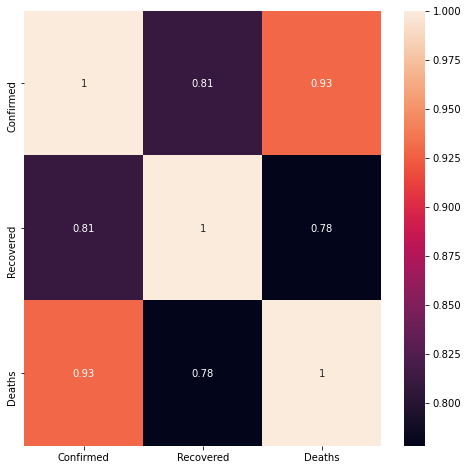

In [40]:
#visuvalization of correlation using Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True)
plt.show()

###### Observation:

all the columns are positively corelated to our target column Deaths

# Data Cleaning

## Droping Columns

In [42]:
#Dropping columns which are no needed
df.drop("Date",axis=1,inplace=True)

## Label Encoding

In [46]:
#LabelEncoding the column country
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Country"]=le.fit_transform(df["Country"])


In [48]:
df.describe()

,Country,Confirmed,Recovered,Deaths
count,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,93.500000,7.969368e+03,2581.801714,526.935030
std,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,0.000000e+00,0.000000,0.000000
25%,46.750000,0.000000e+00,0.000000,0.000000
50%,93.500000,1.800000e+01,1.000000,0.000000
75%,140.250000,7.300000e+02,123.000000,13.000000
max,187.000000,1.680913e+06,384902.000000,98913.000000


###### KEY OBSERVATION:
    
    There are no missing values
    
    1)Here we find that the mean is higher than median 

If the mean is HIGHER than the median, the distribution is positively skewed.

    2)the maximum and the 75% had a wide range of difference than it have to be normal in attributes "Recovered" and "Deaths"

 we infer that we may have large outliers and skewness in some of the attributes 



## Finding Outliers

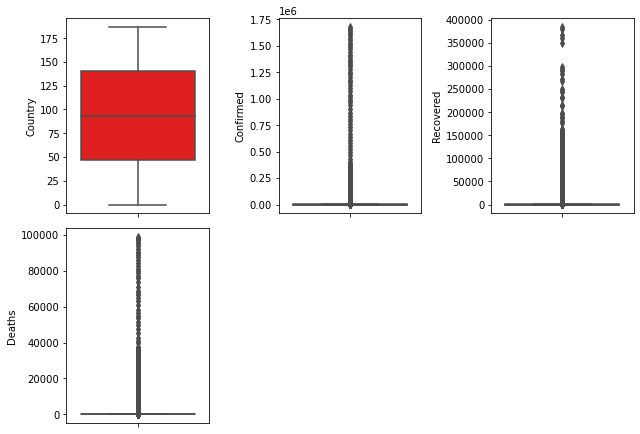

In [51]:
#Plotting Outliers
collist=df.columns.values
ncol=3
nrow=3
plt.figure(figsize=(3*nrow,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="red",orient="v")
    plt.tight_layout()               

###### Observation:
    
    we find high number of outliers in Confirmed , Received,` Deaths

## Treating Outliers

In [54]:
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[1.72286214, 0.13641539, 0.17049719, 0.13197356],
       [1.70443581, 0.13641539, 0.17049719, 0.13197356],
       [1.68600948, 0.13641539, 0.17049719, 0.13197356],
       ...,
       [1.68600948, 0.13215314, 0.16983681, 0.11970126],
       [1.70443581, 0.12066732, 0.1483084 , 0.13022038],
       [1.72286214, 0.13545681, 0.16884624, 0.13097174]])

In [55]:
threshold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [57]:
df.shape

(23688, 4)

In [59]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(23177, 4)

In [60]:
#Percentage loss
loss=(23688-23177)/23177*100
loss

2.2047719722138326

###### Observation:

The Outliers loss percentange is minimal.so proceeding further

## Finding Skewness

In [62]:
#checking for skewness
df.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

###### Observation:

All the columns are positively skewed

## Skewness treatment

In [67]:
#Skewness treatment
#treating using log
threshold=0.55
import numpy as np
for i in df_new.columns:
    if df_new[i].skew()>0.55:
        df_new[i]=np.log1p(df_new[i])
    

# Seperating Target Variable


In [68]:
x_l=df_new.drop(["Deaths"],axis=1)
y=df_new["Deaths"]

# Scaling Input Variable

In [69]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x


array([[-1.72042358, -1.03070189, -0.80898219],
       [-1.701984  , -1.03070189, -0.80898219],
       [-1.68354441, -1.03070189, -0.80898219],
       ...,
       [ 1.69089972,  0.58728973,  0.00564341],
       [ 1.7093393 ,  0.96940955,  1.16824701],
       [ 1.72777889,  0.1540612 ,  0.29787551]])

# preparing dataset for model training


## splitting the testing and training data

In [70]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [72]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16223, 3), (6954, 3), (16223,), (6954,))

# finding best model


In [73]:
#importing our model libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
lr=LinearRegression()
ls=Lasso()
rd=Ridge()
en=ElasticNet()
from sklearn.svm import SVR
svr=SVR()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
#importing error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


## using Algorithms via for loop

In [77]:
#using Algorithms via for loop
model=[lr,svr,knn,ls,rd,en]
for m in model:
    m.fit(x_train,y_train)
    print("score of ",m,"is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("r2_score is :",r2_score(y_test,predm))
    print("error")
    print("mean_absolute_error is :",mean_absolute_error(y_test,predm))
    print("mean_squared_error is :",mean_squared_error(y_test,predm))
    print("root mean_absolute_error is :",np.sqrt(mean_squared_error(y_test,predm)))
    
    print("**********************************************************")
    print("\n\n")
    
    

score of  LinearRegression() is 0.8115283383510055
r2_score is : 0.812557466714224
error
mean_absolute_error is : 0.6675480270414605
mean_squared_error is : 0.823641224462558
root mean_absolute_error is : 0.9075468166781029
**********************************************************



score of  SVR() is 0.9090608097676004
r2_score is : 0.9053385326093123
error
mean_absolute_error is : 0.4006050999933524
mean_squared_error is : 0.41595194828176735
root mean_absolute_error is : 0.6449433682748954
**********************************************************



score of  KNeighborsRegressor() is 0.9814189792984589
r2_score is : 0.968100916871966
error
mean_absolute_error is : 0.1586008661931169
mean_squared_error is : 0.14016775929265876
root mean_absolute_error is : 0.37438984934511615
**********************************************************



score of  Lasso() is 0.5789332816178183
r2_score is : 0.5825259966375079
error
mean_absolute_error is : 1.0174679148509493
mean_squared_error is :

## Ensemble Technique to boostup our score

In [75]:
#using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("score is",rf.score(x_train,y_train))
print("r2 score is",r2_score(y_test,rf_pred))
print("mean absolute error is : ",mean_absolute_error(y_test,rf_pred))
print("mean squared error is : ",mean_squared_error(y_test,rf_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,rf_pred)))

score is 0.99759413939994
r2 score is 0.9823804116120604
mean absolute error is :  0.1144243461264277
mean squared error is :  0.07742223229688995
root mean absolute error is :  0.3382666790070043


In [81]:
#using AdaBoost
from sklearn.ensemble import AdaBoostRegressor
knn=KNeighborsRegressor()
ada=AdaBoostRegressor(base_estimator=knn,n_estimators=20,learning_rate=0.1,random_state=5)
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
ada_score=ada.score(x_train,y_train)
print("score is",ada_score)
print("r2 score is",r2_score(y_test,ada_pred))
print("mean absolute error is : ",mean_absolute_error(y_test,ada_pred))
print("mean squared error is : ",mean_squared_error(y_test,ada_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,ada_pred)))




score is 0.9901110024161976
r2 score is 0.9751769167814823
mean absolute error is :  0.13495768603481775
mean squared error is :  0.1090751085073357
root mean absolute error is :  0.36736587489152794


###### Observation:

we observe RandomForest Regressor Performs well.

from above it is clear that the ensemble technique overfits the Linear model

## HyperTuning best model

    

In [83]:
#Hyper parameter Tuning
#RandomForestRegressor
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={"n_estimators" :[1,10,100], "random_state": list(range(0,10))}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 100, 'random_state': 2}


In [84]:
#using RandomForestRegressor with best Result
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=2,n_estimators=100)
rf.fit(x_train,y_train)
rf_test_pred=rf.predict(x_test)
rf_train_pred=rf.predict(x_train)
rf_test_acc=r2_score(y_test,rf_test_pred)
rf_train_acc=r2_score(y_train,rf_train_pred)
print("training accuracy : ",rf_train_acc*100)
print("final accuracy : ",rf_test_acc*100)


training accuracy :  99.77191188961233
final accuracy :  98.2756886560655


In [87]:
#cross validating 
#Random forest classifier
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
accuracy=r2_score(y_test,pred_test)
for i in range(15,25):
    cr=cross_val_score(rf,x,y,cv=i)
    cross=cr.mean()
    print("At cv : ",i,"\ncross val score is : ",cross*100,"\nr2_score is: ",accuracy*100)
    print("******************************************************************************")
    print("\n\n")

        



At cv :  15 
cross val score is :  91.98135073065767 
r2_score is:  98.2756886560655
******************************************************************************



At cv :  16 
cross val score is :  92.44366518377382 
r2_score is:  98.2756886560655
******************************************************************************



At cv :  17 
cross val score is :  92.24765355919953 
r2_score is:  98.2756886560655
******************************************************************************



At cv :  18 
cross val score is :  92.65825620193213 
r2_score is:  98.2756886560655
******************************************************************************



At cv :  19 
cross val score is :  92.9818880536178 
r2_score is:  98.2756886560655
******************************************************************************



At cv :  20 
cross val score is :  93.16906806366072 
r2_score is:  98.2756886560655
******************************************************************************




## Saving Best Model

In [88]:
import pickle
filename="covid19_death.pkl"
pickle.dump(rf,open(filename,"wb"))


# CONCLUSION

In [92]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_li=pd.DataFrame({"original":a,"Predicted":predicted})
df_li

,original,Predicted
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,1.098612,1.814273
4,0.000000,0.000000
...,...,...
6949,3.401197,3.397807
6950,0.000000,0.000000
6951,0.000000,0.000000
6952,0.000000,0.000000
